In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [4]:
# Reading papers.csv into papers
papers = pd.read_csv("/content/drive/MyDrive/papers.csv")

# Printing out the first rows of papers
papers.head()


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [5]:
 #Removing the columns
papers.drop(['id','event_type','pdf_name'],axis=1,inplace=True)

# Printing for checking the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


<Axes: xlabel='year'>

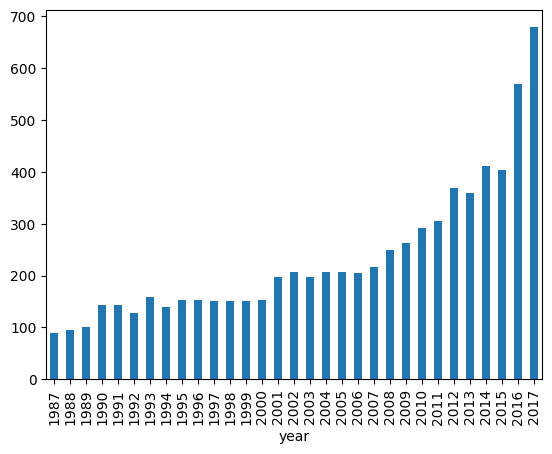

In [6]:
# Groupping the papers by year
groups = papers.groupby('year')

# Determining the size of each group
counts = groups.size()

# Visualising the counts as a bar plot
counts.plot(kind='bar')

In [7]:
# Printing the titles of the first rows 
print(papers['title'].head())

# Removing the punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Converting now the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Printing now the processed titles of the first rows 
papers['title_processed'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

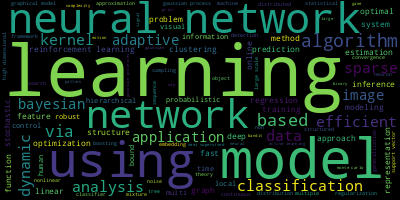

In [8]:
# Joining the different processed titles togetheras required by WordCloud
long_string = ' '.join(papers['title_processed'])

# Creating a WordCloud object, generate a wordcloud and visualising it
wordcloud = wordcloud.WordCloud()

# Generating a word cloud
wordcloud.generate(long_string)

# Visualizing the word cloud to see preprocessing
wordcloud.to_image()

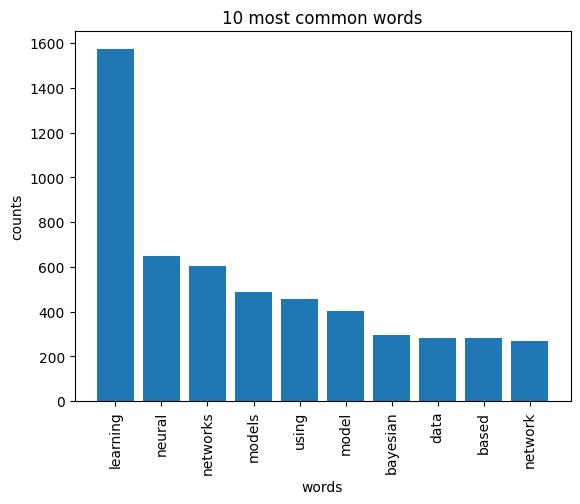

In [10]:
# Defining the Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialising the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fitting and transformin the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualising now the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)